### 회귀모델 실습 부분

직접 회귀모델을 `sklearn`을 통해서 수행해보았는데, 어떠셨나요?<br>
코드 몇 줄 치니까 알아서해주는데... 내가 가는 이 길이 어디로 가는지 어디로 날 데려가는지...
자세하게 모델이 어떻게 돌아가는지는 **선형대수학**에서 배우도록 하구요, 저희는 우선 이 모듈을 어떻게 쓰는지 부터 잘 알아둡시다.

이미 모듈이 만들어져있으면, 최대한 활용하자!
+ sklearn
+ tensorflow, pytorch

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
r = np.random.RandomState(10)

`RandomState`는 난수표 번호를 의미한다고 우선은 말씀드릴게요. 자세한 건 링크를 참고부탁드려요! <br>
[참고링크1](https://evan-moon.github.io/2019/07/14/what-is-random/) <br>
[참고링크2](https://namu.wiki/w/%EB%82%9C%EC%88%98%EC%83%9D%EC%84%B1) <br>
컴퓨터는 스스로 난수를 만들어내지 못합니다. 그래서 미리 만둘어둔 난수표가 있는데 이 난수표 번호(여기서는 10번 난수표)를 가지고 난수를 **불러온다**고 생각하시면 편할 것 같아요. 이걸 고정시켜주면 저희가 다음에도 같은 난수를 만들 수 있겠죠?

In [3]:
r

RandomState(MT19937) at 0x21B8902F048

`r.rand(100)`을 해주게 되면, `0` ~ `1` 사이의 숫자 `100`개를 만들어줍니다. 여기에 10배를 해주면 `0` ~ `10` 사이의 숫자 100개가 되겠네요!

In [6]:
x = 10 * r.rand(100)
y = 2*x - 3*r.rand(100)

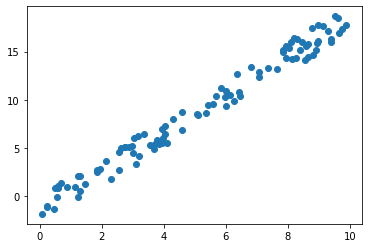

In [7]:
plt.scatter(x, y)

In [8]:
print(x.shape, y.shape)

(100,) (100,)


`sklearn`의 모든 회귀, 분류와 같은 **모델**들은 전부 `estimator`라는 클래스를 [상속](https://scikit-learn.org/stable/developers/develop.html) 받습니다.
이 `estimator`를 사용하는 방법은
1. 선언한다(=인스턴스를 생성한다) (`model = LinearRegression()`)
2. Fitting한다 (`model.fit(X, y)`)
3. Predict한다 (`model.predict(X_test)`) 

사용 방법은 크게 어렵지 않습니다. 이 3가지 단계(제가 지난 주에도 말씀드렸죵)를 `estimator`뿐 아니라 다른 류의 인터페이스(`preprocessing`)들도 비슷하게 작동하니 꼭 기억해두세요!

#### 1. 선언한다

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 2. Fitting한다.
여기서 주어진 feature(우리의 경우 X)는 항상 행렬꼴이어야한다. 즉, 차원이 2차원이어야한다는 뜻입니다.

In [14]:
x.reshape(-1, 1).ndim

2

In [10]:
model.fit(x, y)

ValueError: Expected 2D array, got 1D array instead:
array=[8.13316084 7.84866718 3.93419112 8.64479194 3.84030768 2.57302887
 8.2940192  7.36382704 5.07600908 6.44326615 2.13186565 8.95708949
 9.65946252 3.17001562 8.65552618 3.10283707 0.25263945 0.49195158
 1.84626838 0.69033342 2.57475423 9.13581732 4.57849512 1.30211789
 8.09891665 4.0346984  0.24432645 8.56831043 2.74294819 7.09105964
 3.55772343 7.94309062 8.44618861 5.38147517 5.59086516 1.22509981
 3.77641919 4.28747329 5.11208646 8.9176257  3.00210612 3.96441879
 7.93273233 4.12276077 1.8486755  8.40247316 5.692714   0.60050206
 9.88916974 2.28782333 6.14701713 3.68026681 8.02775936 6.27561853
 8.21216476 2.88253139 2.74795132 6.01051891 9.38514197 7.07296309
 2.63403165 1.22335921 4.58724229 9.74812499 6.80574374 1.93253732
 0.46739227 9.52643937 8.58649015 8.27903176 9.63900523 5.98936449
 9.30915836 1.46768814 1.13960309 3.72028902 7.66560127 3.21142031
 6.38035081 0.09221102 5.43465038 3.37754647 8.98024309 9.40707038
 3.84121849 3.96117792 8.97279945 0.58822368 4.05379288 1.30175541
 0.86969409 7.83964287 3.04573355 5.84055873 8.78466178 8.80792061
 6.00954207 6.45227746 0.56628203 2.97484097].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [15]:
x.ndim, x.reshape(100, 1).ndim

(1, 2)

In [16]:
model.fit(x.reshape(100, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 3. Predict한다.
새로운 데이터에 대해서 예측을 해줍니다. 저희의 경우, -1부터 11까지 100개의 숫자(`np.linspace(-1, 11, 100)`)을 모델에 넣어주면 어떤 직선이 나오겠죠? 이게 바로 모델이 예측한 **회귀선**이 됩니다.

In [18]:
x_new = np.linspace(-1, 11, 100)
print(x_new.shape)
X_new = x_new.reshape(100, 1)

(100,)


In [19]:
y_new = model.predict(X_new)

손실함수(Loss Function)

Root Mean Square Error: $RMSE = \sqrt{\frac{1}{N}\sum_{n_{samples}}{(y_{true}- y_{pred})^2}}$

In [20]:
from sklearn.metrics import mean_squared_error

error = np.sqrt(mean_squared_error(y, y_new))
error

9.059510362209824

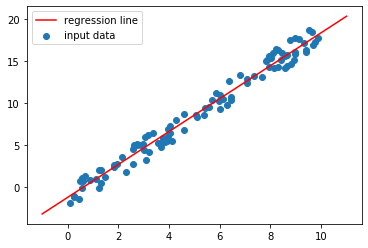

In [22]:
plt.scatter(x, y, label='input data')
plt.plot(X_new, y_new, color='red', label='regression line')
plt.legend()

### 분류모델 실습 부분

In [23]:
from sklearn.datasets import load_wine

data = load_wine()

In [24]:
dir(data)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [27]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [29]:
X = data.data
y = data.target

In [30]:
X.shape, y.shape

((178, 13), (178,))

여기서도 마찬가지!
#### 1. 선언한다

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

#### 2. Fitting 한다

In [32]:
model.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### 3. Predict 한다.

In [33]:
y_pred = model.predict(X)

흠 모델이 얼마나 잘했나 한 번 봅시다.

In [34]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y, y_pred))
print("accuracy=", accuracy_score(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178

accuracy= 1.0


도저히 알 수 없는 숫자 투성이네요. 이에 대한 것 또한 후에 상세히 다룰 예정인데 오늘은 이걸 이해하기 위한 그림부터 한 번 봅시다. 자세한 내용이 궁금하신 분은 아래 링크를 참고해주세요!

[Precision, Recall, F1...? 이게 뭐람](https://sumniya.tistory.com/26)

##### Confusion Matrix

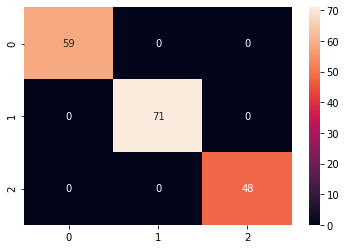

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y, y_pred), annot=True)

흠... 이 말인 즉슨 100% 전부 맞추었다는.. 뜻이군요. 근데 생각해보면 당연합니다. 가지고 있는 데이터로 맞춰보라한다음에 다시 이 데이터로 예측을 하니 100%가 나올 수 밖에요(주작...) 그러니 우리는 이 데이터를 **분리**해주어야 합니다. 이 분리과정 또한 `sklearn`에서 아주 쉽게 만들어놓았습니다.

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
178 * 0.2

35.6

In [38]:
X_train.shape, y_train.shape

((142, 13), (142,))

In [40]:
X_test.shape, y_test.shape

((36, 13), (36,))

그렇다면 다시 training 데이터로'만' 훈련시켜볼까요?
#### 1. 선언한다

In [42]:
model = RandomForestClassifier()

#### 2. Fitting 한다.

In [43]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### 3. Predict 한다.

In [44]:
y_pred = model.predict(X_test)

흠 이제 얼마나 잘했는지 다시 확인해봅시다.

In [45]:
print(classification_report(y_test, y_pred))
print("accuracy=", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

accuracy= 1.0


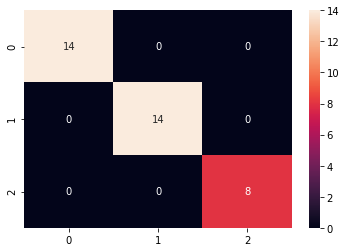

In [46]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

여전히 잘하네요. 왜냐하면 데이터 자체가 어렵지 않게 구성되어 있기 떄문입니다.

In [47]:
X = pd.DataFrame(data.data, columns=data.feature_names)
X['target'] = data.target
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


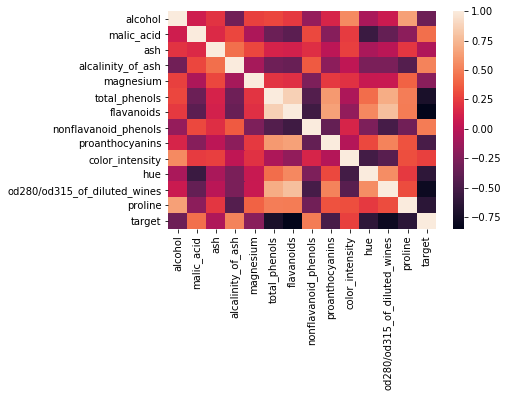

In [48]:
sns.heatmap(X.corr())